<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/clase_de_m%C3%A9todo_de_minimos_cuadrados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Queremos resolver la ecuación
$$\frac{d^2u}{dx^2}+u=-x$$

sujeta a condiciones de frontera

$$u(0)=u(1)=0$$

Usaremos calculo símbolico y compararemos la solución númerica contra la analitica

##SOLUCIÓN ANALÍTICA

In [ ]:
#importamos librerias

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Definimos la variable simbólica y función
x,a,b=sp.symbols('x a b')
u= sp.Function('u')


In [ ]:
#Ecuación diferencial u''+u=x
ode = u(x).diff(x,x)+u(x)+x
sp.dsolve(ode,u(x))  #resuelve la ecuaión

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [ ]:
#resolver con las condiciones iniciales
sol = sp.dsolve(ode, ics={u(0):0 , u(1):0})

print("Solución exacta simbólica:")
sol

Solución exacta simbólica:


Eq(u(x), -x + sin(x)/sin(1))

In [ ]:
#convertimos la solución simbolica a función numérica
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr, "numpy") #se redefine como arreglo

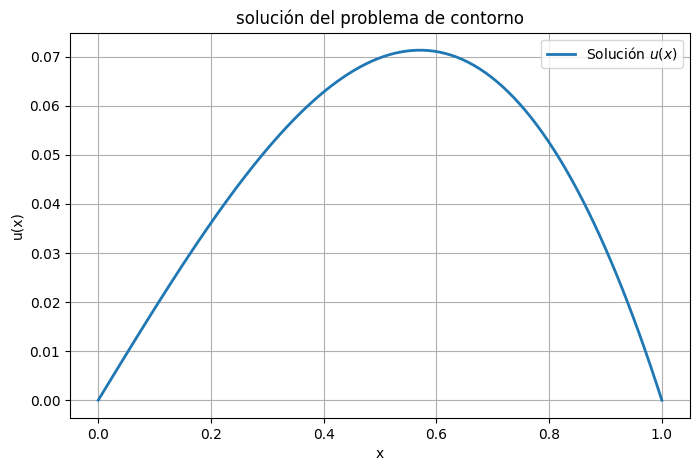

In [ ]:

#malla para graficar
xx= np.linspace(0,1,100)
yy= u_num(xx)



#Grafica
plt.figure(figsize=(8,5))
plt.plot(xx,yy , label = "Solución $u(x)$", linewidth=2)
plt.title("solución del problema de contorno")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

##SOLUCIÓN NUMERICA


Proponemos la función de prueba

In [ ]:
u_n= a *x*(1-x) + b *x**2 *(1-x)
u_n

a*x*(1 - x) + b*x**2*(1 - x)

Definimos el residuo o error E

In [ ]:
u_n_2= sp.diff(u_n,x,2) #calculo de la segunda derivada
u_n_2

-2*(a + 2*b*x + b*(x - 1))

In [ ]:
#E(x)
E= u_n_2 + u_n +x
E

a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

In [ ]:
E.simplify()

-a*x*(x - 1) - 2*a - b*x**2*(x - 1) - 4*b*x - 2*b*(x - 1) + x

Imponemos las condiciones para obtener los puntos criticos del residuo:

$$\frac{\partial}{\partial a} ∫_0^1 E^2 dx= 0$$

$$\frac{\partial}{\partial b} ∫_0^1 E^2 dx= 0$$

Y resolvemos el sistema de ecuaciones resultantes:


In [ ]:
I = sp.integrate( E**2, (x,0,1))
I

101*a**2/30 + 101*a*b/30 - 11*a/6 + 131*b**2/35 - 19*b/10 + 1/3

In [ ]:
sp.simplify(I)

101*a**2/30 + 101*a*b/30 - 11*a/6 + 131*b**2/35 - 19*b/10 + 1/3

In [ ]:
dIa = sp.diff(I,a)
dIb= sp.diff(I,b)

In [ ]:
#otra forma de imprimir

print (dIa, "\n", dIb)

101*a/15 + 101*b/30 - 11/6 
 101*a/30 + 262*b/35 - 19/10


In [ ]:
#para igualar a 0
soleq = sp.solve ([dIa, dIb], [a,b], simplify=True)
soleq

{a: 46161/246137, b: 413/2437}

In [ ]:
#sustituir en la función de prueba
u_approx = E.subs (soleq)
u_approx

413*x**2*(1 - x)/2437 + 46161*x*(1 - x)/246137 - 41*x/2437 - 8896/246137

In [ ]:
u_approx_fn =sp.lambdify(x,u_approx, "numpy")

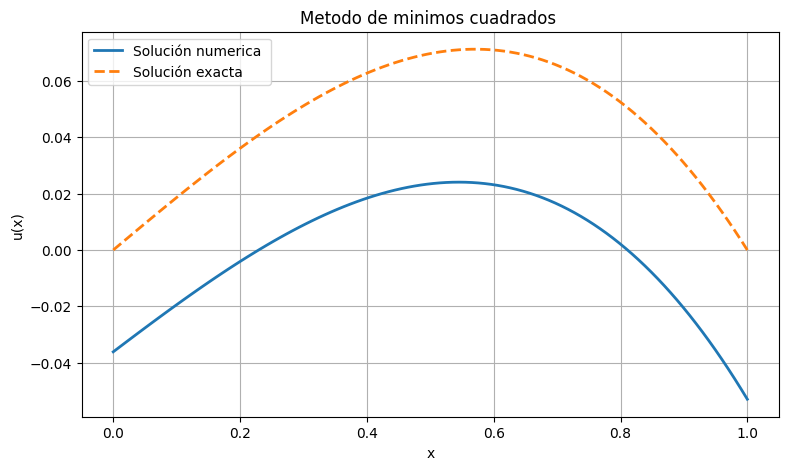

In [ ]:
xx= np.linspace(0,1,100)


plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx) , label = "Solución numerica ", linewidth=2)
plt.plot(xx, yy,"--", label = "Solución exacta", linewidth=2) #-- tipo de linea punteada

plt.title("Metodo de minimos cuadrados ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()